#### Module 10: Unsupervised Learning

#### Case Study–2

Objective:

• Use k-means clustering for image segmentation and to identify the dominant color in the image.

Question:
1. Open and display the image “dog.jpeg”. Convert the image into a numpy array, so that it can be used in further processing.
[Hint: Use the PIL module from python]
2. Find out the dimensions of the image and convert it into a two-dimensional array.
3. Use K-means clustering with k set to 3 and cluster the image.
 [Hint: Refer to k-means module of scikit learn]
4. Predict the cluster label of every pixel in the image and plot it back as an image.
5. Find out the three dominant colors in the image.
[Hint: The cluster centers should correspond to three dominant colors]

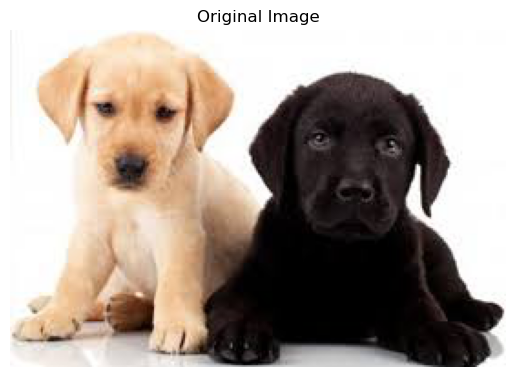

In [6]:
# Open and display the image “dog.jpeg”. Convert the image into a numpy array, so that it can be used in further processing. 
# [Hint: Use the PIL module from python]

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

# Step 1: Open and display the image
img = Image.open("dogs.jpeg")
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [7]:
# Find out the dimensions of the image and convert it into a two-dimensional array.

# Convert image to numpy array
img_array = np.array(img)
print("Image dimensions:", img_array.shape)  # (height, width, channels)

# Reshape into 2D array (pixels × channels)
pixels = img_array.reshape(-1, 3)  # each row = [R,G,B]

Image dimensions: (185, 272, 3)


In [8]:
# Use K-means clustering with k set to 3 and cluster the image. [Hint: Refer to k-means module of scikit learn]

# Apply KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixels)

KMeans(n_clusters=3, random_state=42)

In [9]:
# Predict the cluster label of every pixel in the image and plot it back as an image.

labels = kmeans.predict(pixels)

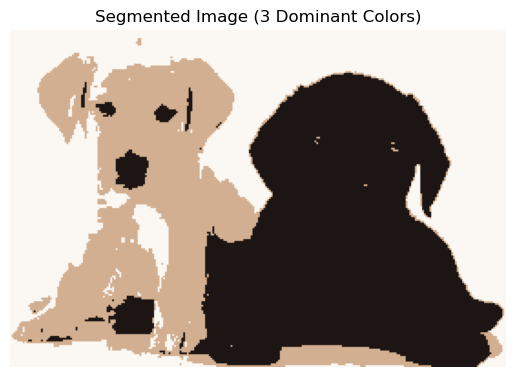

Three Dominant Colors (RGB):
Color 1: [210 175 144]
Color 2: [29 21 20]
Color 3: [251 247 243]


In [10]:
# Find out the three dominant colors in the image. [Hint: The cluster centers should correspond to three dominant colors]

# Replace each pixel with its cluster center (dominant color)
segmented_img = kmeans.cluster_centers_[labels]
segmented_img = segmented_img.reshape(img_array.shape).astype(np.uint8)

# Display segmented image
plt.imshow(segmented_img)
plt.title("Segmented Image (3 Dominant Colors)")
plt.axis("off")
plt.show()

# Find the three dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)
print("Three Dominant Colors (RGB):")
for i, color in enumerate(dominant_colors, 1):
    print(f"Color {i}: {color}")
